<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddies/blob/main/GrowBuddies/growbuddiesproject/growbuddies/drgrowbuddy/DrGrowBuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Journey Begins
Today is 1/16/2022. MLK day and all that.  Starting my DrGrowBuddy Journey.  The first thing I want to do is run a training/test/validation run using two categories: healthy and unhealthy.  This will get me started down the data pipeline as well as just getting started.

I found [this PyTorch GitHub](https://github.com/abdullahselek/plant-disease-classification-pytorch) with Python code for Plant Disease Detection.  HappyDay!

## Import Libraries

In [ ]:
import torch

In [ ]:
# CPU or GPU
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"The device running the code is the {DEVICE}.")

The device running the code is the cpu.


## Get Data
This is interesting because my goal is to diagnose cannabis plant nutrient deficiencies, then move on to diseases and then pests.  I don't have a lot of images.  So my options for a lot of images include scraping the internet, using existing plant databases, using my own images.  Let's see...

### Existing Plant Data sets
Promising data sets include:
- [PlantDoc dataset](https://github.com/pratikkayal/PlantDoc-Dataset)
- [Plant Leaf dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)
- [Plant Village dataset](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=plant_village)  

#### PlantDoc Dataset
##### GitHub
https://github.com/pratikkayal/PlantDoc-Dataset    

##### License
Creative Commons Attribution 4.0 International [Link](https://github.com/pratikkayal/PlantDoc-Dataset/blob/master/LICENSE.txt).

##### Bibtex
@inproceedings{10.1145/3371158.3371196,
author = {Singh, Davinder and Jain, Naman and Jain, Pranjali and Kayal, Pratik and Kumawat, Sudhakar and Batra, Nipun},
title = {PlantDoc: A Dataset for Visual Plant Disease Detection},
year = {2020},
isbn = {9781450377386},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3371158.3371196},
doi = {10.1145/3371158.3371196},
booktitle = {Proceedings of the 7th ACM IKDD CoDS and 25th COMAD},
pages = {249–253},
numpages = {5},
keywords = {Deep Learning, Object Detection, Image Classification},
location = {Hyderabad, India},
series = {CoDS COMAD 2020}
}
##### Paper
[PlantDoc: A Dataset for Visual Plant Disease Detecton](https://arxiv.org/abs/1911.10317)

__From the abstract:__
India loses 35% of the annual crop yield due to plant diseases. Early detection of plant diseases remains difficult due to the lack of lab infrastructure and expertise. In this paper, we explore the possibility of computer vision approaches for scalable and early plant disease detection. The lack of availability of sufficiently large-scale non-lab data set remains a major challenge for enabling vision based plant disease detection. Against this background, we present __PlantDoc: a dataset for visual plant disease detection. Our dataset contains 2,598 data points in total across 13 plant species and up to 17 classes of diseases, involving approximately 300 human hours of effort in annotating internet scraped images.__ To show the efficacy of our dataset, we learn 3 models for the task of plant disease classification. Our results show that modelling using our dataset can increase the classification accuracy by up to 31%. We believe that our dataset can help reduce the entry barrier of computer vision techniques in plant disease detection.

#### Explore PlantDoc Dataset


In [20]:
from pathlib import Path
# def walk_through_dir(dir_path):
#   """
#   Walks through dir_path returning its contents.
#   Args:
#     dir_path (str or pathlib.Path): target directory
  
#   Returns:
#     A print out of:
#       number of subdiretories in dir_path
#       number of images (files) in each subdirectory
#       name of each subdirectory
#   """
#   for dirpath, dirnames, filenames in os.walk(dir_path):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
import glob
def walk_through_dir(dir_path):

    data = []
    for dirpath in Path(dir_path).rglob('*'):
        if dirpath.is_dir():
            path_to_images = dir_path + "/" + dirpath.parent.name + "/" + dirpath.name
            n_images_in_directory_at_path = len(glob.glob(path_to_images + "/*.jp*g"))
            if n_images_in_directory_at_path > 0:
              data.append([n_images_in_directory_at_path,  dirpath.parent.name + "/" + dirpath.name])
    return data


In [ ]:
# Download data files from GitHub
from typing import Optional
from pathlib import Path
import zipfile
import urllib.request
from concurrent.futures import ThreadPoolExecutor

class Content:
    def __init__(self, base_dir: Optional[Path] = None) -> None:
        self.base_dir = base_dir or Path.cwd()
    
    def create_dir(self, path: Optional[Path] = None) -> None:
        path = path or self.base_dir
        path.mkdir(parents=True, exist_ok=True)
    
    def get_file_path(self, url: str) -> Path:
        parts = Path(url).parts
        filename = parts[-1]
        return self.base_dir / filename

class Downloader:
    def __init__(self, url: str, content: Content) -> None:
        self.url = url
        self.file_path = content.get_file_path(self.url)
    
    def download(self) -> None:
        with ThreadPoolExecutor() as executor:
            executor.submit(urllib.request.urlretrieve, self.url, self.file_path)

    def extract(self) -> None:
        with zipfile.ZipFile(self.file_path, 'r') as zip_ref:
            zip_ref.extractall(self.file_path.parent)
        self.file_path.unlink()





In [ ]:
# download.
url = "https://github.com/pratikkayal/PlantDoc-Dataset/archive/master.zip"
content_dir = Path(".")
content = Content(content_dir)
content.create_dir()
downloader = Downloader(url, content)
downloader.download()
downloader.extract()

In [21]:
# Check out the directory structure.
data = walk_through_dir("/content/PlantDoc-Dataset-master")
data

[[4, 'test/Corn Gray leaf spot'],
 [8, 'test/Soyabean leaf'],
 [10, 'test/Apple rust leaf'],
 [9, 'test/Bell_pepper leaf spot'],
 [10, 'test/Tomato leaf late blight'],
 [10, 'test/Cherry leaf'],
 [11, 'test/Blueberry leaf'],
 [6, 'test/Tomato mold leaf'],
 [8, 'test/Tomato leaf'],
 [10, 'test/Tomato leaf mosaic virus'],
 [9, 'test/Tomato leaf bacterial spot'],
 [12, 'test/Corn leaf blight'],
 [8, 'test/Bell_pepper leaf'],
 [7, 'test/Raspberry leaf'],
 [9, 'test/Apple leaf'],
 [12, 'test/grape leaf'],
 [10, 'test/Corn rust leaf'],
 [8, 'test/grape leaf black rot'],
 [9, 'test/Tomato Early blight leaf'],
 [8, 'test/Potato leaf late blight'],
 [6, 'test/Squash Powdery mildew leaf'],
 [8, 'test/Strawberry leaf'],
 [11, 'test/Tomato Septoria leaf spot'],
 [8, 'test/Potato leaf early blight'],
 [10, 'test/Apple Scab Leaf'],
 [6, 'test/Tomato leaf yellow virus'],
 [9, 'test/Peach leaf'],
 [64, 'train/Corn Gray leaf spot'],
 [57, 'train/Soyabean leaf'],
 [79, 'train/Apple rust leaf'],
 [62, 't

[[106, 'train', 'Blueberry leaf'], [57, 'train', 'grape leaf'], [109, 'train', 'Potato leaf early blight'], [106, 'train', 'Corn rust leaf'], [57, 'train', 'Soyabean leaf'], [85, 'train', 'Tomato mold leaf'], [64, 'train', 'Corn Gray leaf spot'], [103, 'train', 'Peach leaf'], [82, 'train', 'Apple leaf'], [97, 'train', 'Potato leaf late blight'], [47, 'train', 'Cherry leaf'], [112, 'train', 'Raspberry leaf'], [2, 'train', 'Tomato two spotted spider mites leaf'], [62, 'train', 'Bell_pepper leaf spot'], [101, 'train', 'Tomato leaf late blight'], [79, 'train', 'Tomato Early blight leaf'], [124, 'train', 'Squash Powdery mildew leaf'], [83, 'train', 'Apple Scab Leaf'], [70, 'train', 'Tomato leaf yellow virus'], [56, 'train', 'grape leaf black rot'], [88, 'train', 'Strawberry leaf'], [79, 'train', 'Apple rust leaf'], [101, 'train', 'Tomato leaf bacterial spot'], [44, 'train', 'Tomato leaf mosaic virus'], [55, 'train', 'Tomato leaf'], [139, 'train', 'Tomato Septoria leaf spot'], [53, 'train', 

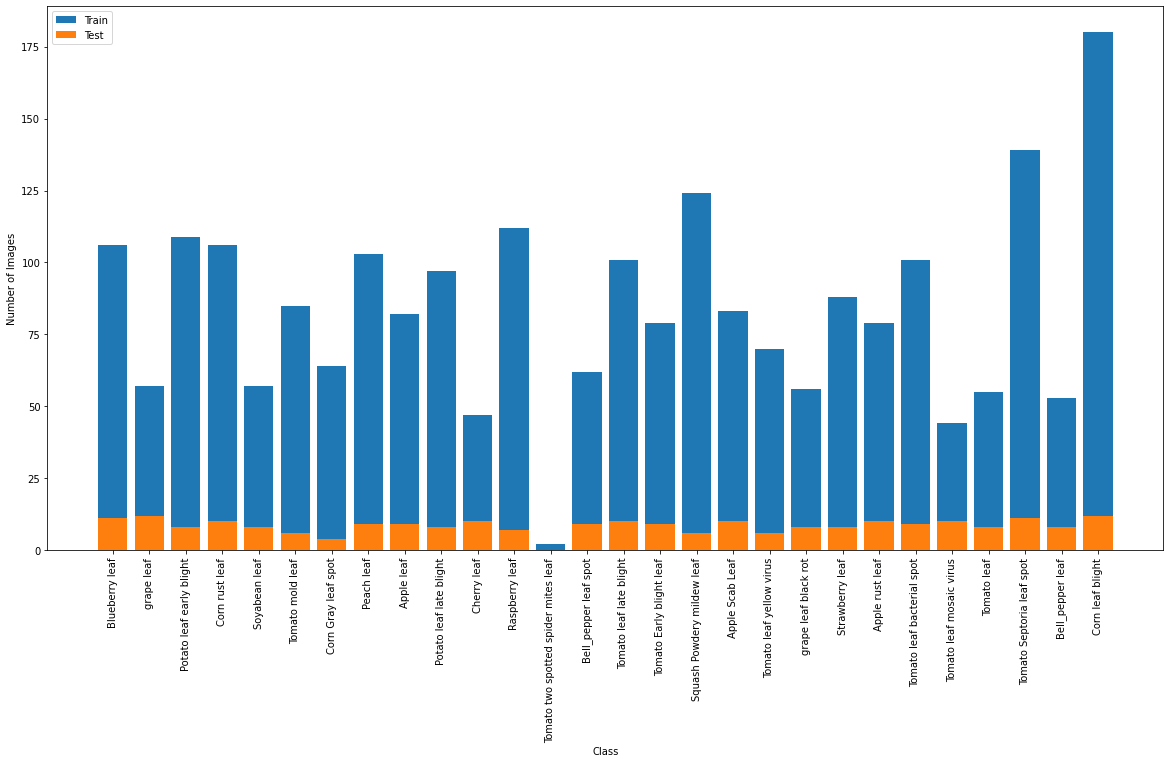

In [ ]:
def draw_histogram(data_list):
    train_data = [i for i in data_list if i[1] == 'train']
    test_data = [i for i in data_list if i[1] == 'test']
    
    train_classes = [i[2] for i in train_data]
    test_classes = [i[2] for i in test_data]
    
    train_counts = [i[0] for i in train_data]
    test_counts = [i[0] for i in test_data]
    
    plt.figure(figsize=(20,10))
    plt.bar(train_classes, train_counts, label='Train')
    plt.bar(test_classes, test_counts, label='Test')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

draw_histogram(data)

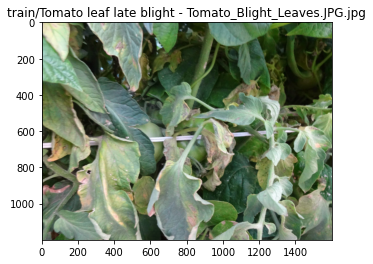

In [87]:
import random, glob
import matplotlib.pyplot as plt

base_path = '/content/PlantDoc-Dataset-master'
# [ <num images>, <parent directory - either test or train>, directory name]

img_dir = random.choice([i[1] for i in data]) # randomly select a directory from the list
path_to_img_files = f"{base_path}/{img_dir}"
img_files = glob.glob(path_to_img_files + "/*.jp*g") # get all jpg and jpeg files in the directory
img_file = random.choice(img_files) # Randomly select

# ... rest of the code
img = plt.imread(img_file)
path = Path(img_file)
title = f"{path.parents[1].name}/{path.parent.name} - {path.name}"
plt.imshow(img)
plt.title(title)
plt.show()

### Explore Plant Leaf dataset


##### Download location
[Plant Leaf dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)

##### License
Creative Commons Attribution 4.0 International [Link](https://github.com/pratikkayal/PlantDoc-Dataset/blob/master/LICENSE.txt).

##### Attributes
J, ARUN PANDIAN; GOPAL, GEETHARAMANI (2019), “Data for: Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network”, Mendeley Data, V1, doi: 10.17632/tywbtsjrjv.1

##### Paper
The [document](https://www.sciencedirect.com/science/article/abs/pii/S0045790619300023?via%3Dihub) is behind a paywall.  That's unfortunate.



In [88]:
def extract(file_path) -> None:
    print(file_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(file_path.parent)
    file_path.unlink()

In [89]:
extract("/content/Plant_leaf_diseases_dataset_with_augmentation.zip")

/content/Plant_leaf_diseases_dataset_with_augmentation.zip


BadZipFile: ignored